<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/CaGraph/main/figures/icon.png" width="25%" style="padding: 20px">
</div>

# Generating and analyzing functional graphs of calcium imaging data

Developer: Veronica Porubsky <br>
Correspondence: verosky@uw.edu <br>
Example data provided by: Eric Zhang and Dr. Sean Piantadosi, Bruchas Lab, University of Washington<br>

This notebook implements a subset of the functionality provided by the Python package, cagraph. This package is designed to construct functional graphs using timeseries data of neurons recorded with calcium imaging. <br>

**Quick Links:** https://github.com/vporubsky/CaGraph


# Tutorial Outline
* [Installations and imports](#installations-imports)
* [Set path and filename](#path-filename)
* [Load and visualize raw calcium imaging data](#load-data)
* [Generate CaGraph object](#cagraph-object)
* [Analyze graph topology](#analyze-graph)
* [Visualize static graph](#visualize-static-graph)
* [Plotting matched samples](#plotting-matched-samples)



# Installations and imports  <a class="anchor" id="installations-imports"></a>

In [1]:
# !pip install -r requirements # uncomment to install package requirements
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import cagraph functionality
from cagraph import CaGraph, CaGraphTimeSamples, CaGraphBatch
import visualization as viz
import preprocess as prep

# Additional useful imports and display setup for Jupyter notebook
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 150)
import os

# Set path and filename  <a class="anchor" id="path-filename"></a>

In [3]:
# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'bla_dataset.csv'


# Load and visualize raw calcium imaging data  <a class="anchor" id="load-data"></a>

In [4]:
# Generate graph object from numpy.ndarray
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')
print(f"This dataset contains {data.shape[0] - 1} neurons and {data.shape[1]} timepoints.")

# Visualize raw data using pandas.DataFrame
df = pd.DataFrame(data)
build_index = ['time']
for i in range(data.shape[0] - 1):
    build_index.append('neuron ' + str(i))
df.index = build_index
display(df)

This dataset contains 39 neurons and 17987 timepoints.


,0,1,2,3,4,...,17982,17983,17984,17985,17986
time,0.100000,0.2000,0.300000,0.400000,0.500000,...,1.798300e+03,1.798400e+03,1.798500e+03,1.798600e+03,1.798700e+03
neuron 0,2.331200,2.2932,2.255900,2.219100,2.183000,...,1.131100e+01,1.112700e+01,1.094500e+01,1.076700e+01,1.059200e+01
neuron 1,5.134400,5.0265,4.920800,4.817400,4.716100,...,3.190500e-01,3.123500e-01,3.057800e-01,2.993600e-01,2.930600e-01
neuron 2,0.000000,0.0000,0.000000,0.000000,0.000000,...,4.707700e+00,4.684200e+00,4.660900e+00,1.245300e+01,1.239100e+01
neuron 3,2.732700,2.7124,2.692200,2.672200,2.652300,...,1.447500e-01,1.436700e-01,1.426000e-01,1.415400e-01,1.404900e-01
...,...,...,...,...,...,...,...,...,...,...,...
neuron 34,2.010200,1.9488,1.889300,1.831600,1.775700,...,4.543200e-12,4.404500e-12,4.270100e-12,4.139700e-12,4.013300e-12
neuron 35,0.000000,0.0000,0.000000,0.000000,0.000000,...,1.348200e-57,1.228000e-57,1.118500e-57,1.018700e-57,9.278800e-58
neuron 36,0.009955,0.0097,0.009451,0.009209,0.008972,...,2.279400e+00,2.220900e+00,2.163900e+00,2.108400e+00,2.054300e+00
neuron 37,0.000000,0.0000,0.000000,0.000000,0.000000,...,4.758200e-07,4.698000e-07,4.638500e-07,4.579800e-07,4.521900e-07


# Generate CaGraph object <a class="anchor" id="cagraph-object"></a>

In [5]:
# Set hyperparameters
THRESHOLD = 0.2

# Generate graph object, called "cg" from CSV file 
cg = CaGraph(DATA_PATH + FILENAME, dataset_id = 'BLA_dataset', threshold=THRESHOLD) 

# Dataset information using CaGraph object
print(f"The dataset contains {cg.num_neurons} neurons and has a time interval of {cg.dt} sec")
print(f"Identifier: {cg.data_id}")

The dataset contains 39 neurons and has a time interval of 0.1 sec
Identifier: BLA_dataset


# Analyze graph topology <a class="anchor" id="analyze-graph"></a>

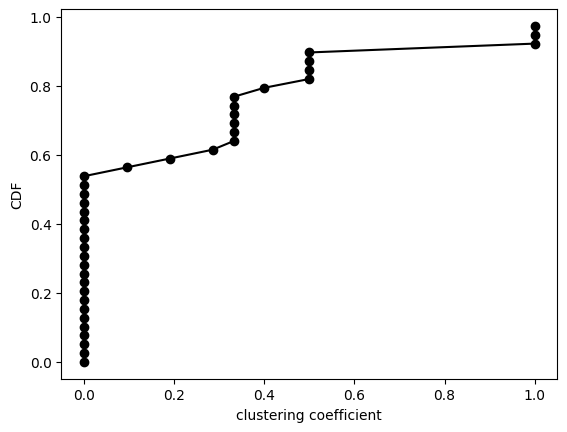

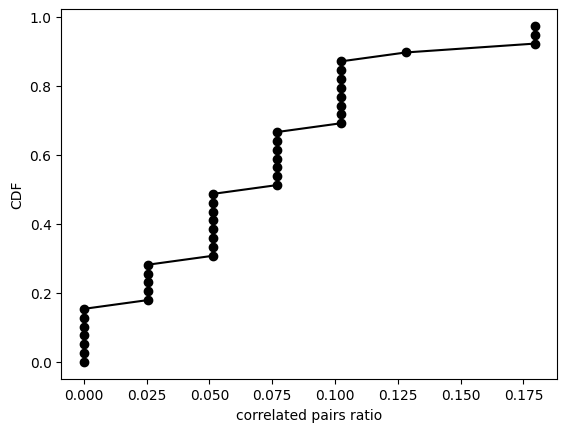

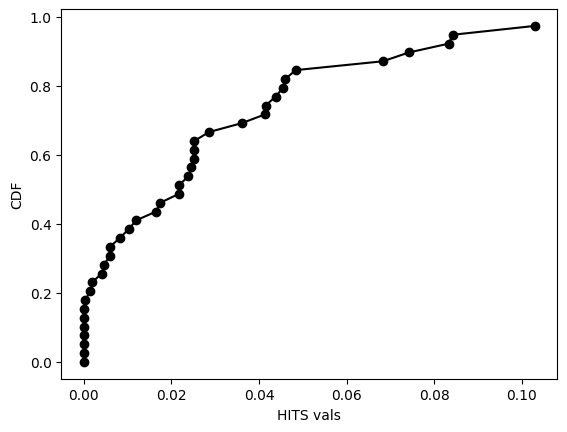

In [6]:
# Analyze graph topology
# Compute the clustering coefficient for all nodes
cg_cc = cg.graph_theory.get_clustering_coefficient()
viz.plot_CDF(data=cg_cc, x_label='clustering coefficient')

# Compute the correlated pairs ratio for all nodes
cg_cr = cg.graph_theory.get_correlated_pair_ratio()
viz.plot_CDF(data=cg_cr, x_label='correlated pairs ratio')

# Compute the hubs in the graph
cg_hits = cg.graph_theory.get_hits_values()
viz.plot_CDF(data=list(cg_hits), x_label='HITS vals')

# Adding node metadata to CaGraph object <a class="anchor" id="node_metadata"></a>

In [7]:
import numpy as np
DATA_PATH = './datasets/'
data = np.genfromtxt(DATA_PATH + f'14-0_DG/14-0_D1_smoothed_calcium_traces.csv', delimiter=',')

# Construct a node attribute containing information about what context each neuron is correlated with
context_active_metadata = np.genfromtxt(DATA_PATH + '14-0_DG/14-0_D1_neuron_context_active.csv', delimiter=',')

# Create
cg = CaGraph(data=data, node_metadata={'context_active': context_active_metadata})

# Added attribute "context_active" contains dictionary with node metadata
print(cg.context_active)

{0: 1.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 1.0, 5: 0.0, 6: 1.0, 7: 1.0, 8: 0.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 1.0, 21: 1.0, 22: 0.0, 23: 0.0, 24: 1.0, 25: 1.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 1.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 1.0, 34: 1.0, 35: 0.0, 36: 1.0, 37: 0.0, 38: 1.0}


# Adding node metadata to interactive visualization <a class="anchor" id="node_metadata_vizualization"></a>

In [9]:
cg = CaGraph(data=data, node_metadata={'context':context_active_metadata})
palette = ('grey','blue','red')

# Visualize graph with node metadata
viz.interactive_network(cagraph_obj=cg,
                        additional_attributes={'context':context_active_metadata},
                        adjust_size_by='degree', 
                        adjust_color_by='context', 
                        palette=palette,
                        show_in_notebook=True)

Loading BokehJS ...

# Report format  <a class="anchor" id="report"></a>

In [10]:
cg = CaGraph(data=data)
report = cg.get_report()
display(report)

,hubs,degree,clustering coefficient,communities,eigenvector centrality,correlated pair ratio,HITS
0,1,6,0.400000,0,4.464164e-01,0.153846,1.498019e-01
1,0,2,1.000000,3,1.506899e-06,0.051282,4.108577e-19
2,0,2,1.000000,2,5.138181e-06,0.051282,-2.739051e-18
3,0,0,0.000000,5,4.801937e-17,0.000000,-0.000000e+00
4,1,6,0.466667,0,4.693003e-01,0.153846,1.574809e-01
...,...,...,...,...,...,...,...
34,1,5,0.400000,0,3.809649e-01,0.128205,1.278386e-01
35,0,3,0.000000,1,2.782119e-02,0.076923,9.334344e-03
36,0,0,0.000000,16,4.801937e-17,0.000000,-0.000000e+00
37,1,5,0.500000,0,4.138950e-01,0.128205,1.388885e-01


In [11]:
# Manually specify neurons you are interested in using their indices
report = cg.get_report(parsing_nodes=[1,3,4,5])
display(report)


,hubs,degree,clustering coefficient,communities,eigenvector centrality,correlated pair ratio,HITS
1,0,2,1.000000,3,1.506899e-06,0.051282,4.108577e-19
3,0,0,0.000000,5,4.801937e-17,0.000000,-0.000000e+00
4,1,6,0.466667,0,4.693003e-01,0.153846,1.574809e-01
5,0,0,0.000000,6,4.801937e-17,0.000000,-0.000000e+00


In [12]:
# Use graph attributes to parse which nodes should be included in the report
# Here, if clustering coefficient value is greater than 0.2, include it
report = cg.get_report(parse_by_attribute='clustering coefficient', parsing_operation='>', parsing_value=0.2)
display(report)

,hubs,degree,clustering coefficient,communities,eigenvector centrality,correlated pair ratio,HITS
0,1,6,0.400000,0,0.446416,0.153846,1.498019e-01
1,0,2,1.000000,3,0.000002,0.051282,4.108577e-19
2,0,2,1.000000,2,0.000005,0.051282,-2.739051e-18
4,1,6,0.466667,0,0.469300,0.153846,1.574809e-01
6,0,3,0.333333,2,0.000006,0.076923,-9.860584e-18
...,...,...,...,...,...,...,...
24,0,2,1.000000,0,0.137339,0.051282,4.608623e-02
27,0,2,1.000000,0,0.200040,0.051282,6.712659e-02
32,0,2,1.000000,3,0.000002,0.051282,-6.162865e-18
34,1,5,0.400000,0,0.380965,0.128205,1.278386e-01


In [31]:
# Here, if context_active value is 1, include it (allows you to analyze only the subpopulation of neurons)
# Todo: figure out why this broke
cg = CaGraph(data=data, node_metadata={'context_active': context_active_metadata})
report = cg.get_report(parse_by_attribute='context_active', parsing_operation='==', parsing_value=1)
display(report)

ValueError: Each key-value pair in the node_metadata dictionary must have a value to be associated with every node.

# Timesampling class - BLA <a class="anchor" id="report"></a>

In [14]:
from cagraph import CaGraphTimeSamples

# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'bla_dataset.csv'

# Load dataset
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')

# Create CaGraphTimeSamples object
ts_cagraph = CaGraphTimeSamples(data=data, 
                                time_samples=[(0,6000), (6000,12000), (12000,18000)], 
                                condition_labels=['prestim', 'stim', 'poststim'], 
                                threshold=0.2)

,hubs,degree,clustering coefficient,communities,eigenvector centrality,correlated pair ratio,HITS
0,0,7,0.285714,2,1.708464e-01,0.179487,0.032909
1,0,4,0.166667,2,1.084099e-01,0.102564,0.020882
2,0,10,0.355556,2,2.412420e-01,0.256410,0.046469
3,0,9,0.388889,3,2.143688e-01,0.230769,0.041293
4,0,10,0.355556,0,2.748439e-01,0.256410,0.052940
...,...,...,...,...,...,...,...
34,0,5,0.800000,2,1.368739e-01,0.128205,0.026365
35,0,2,0.000000,1,3.214851e-02,0.051282,0.006192
36,0,5,0.800000,2,1.368739e-01,0.128205,0.026365
37,0,0,0.000000,7,9.778920e-23,0.000000,-0.000000


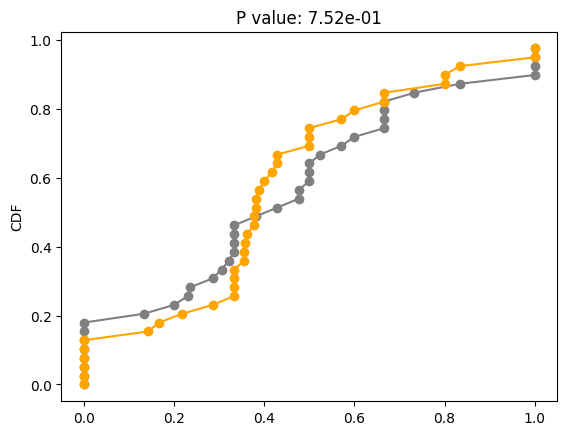

In [15]:
# Timesampled report on only one condition
display(ts_cagraph.get_cagraph('stim').get_report())

# Timesampled individual analyses
cc_prestim = ts_cagraph.get_cagraph('prestim').graph_theory.get_clustering_coefficient()
cc_stim = ts_cagraph.get_cagraph('stim').graph_theory.get_clustering_coefficient()
viz.plot_CDFs(data_list=[cc_prestim, cc_stim], colors=['grey', 'orange'])

In [16]:
#%% Timesampled visualization
pos = viz.interactive_network(ts_cagraph.get_cagraph('prestim'), return_position=True, show_in_notebook=True)

Loading BokehJS ...

In [17]:
viz.interactive_network(ts_cagraph.get_cagraph('stim'), position=pos, show_in_notebook=True)

Loading BokehJS ...

# Timesampling class - DG <a class="anchor" id="report"></a>

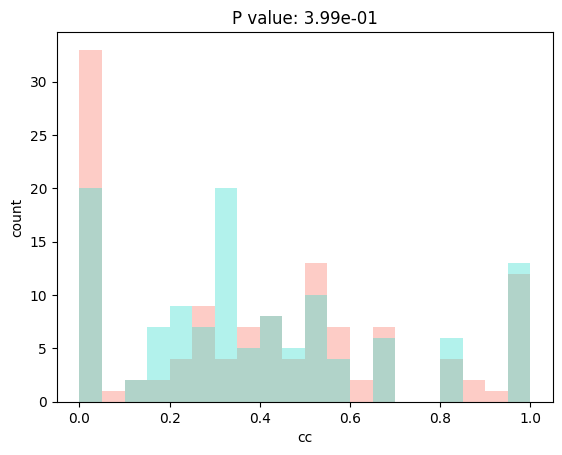

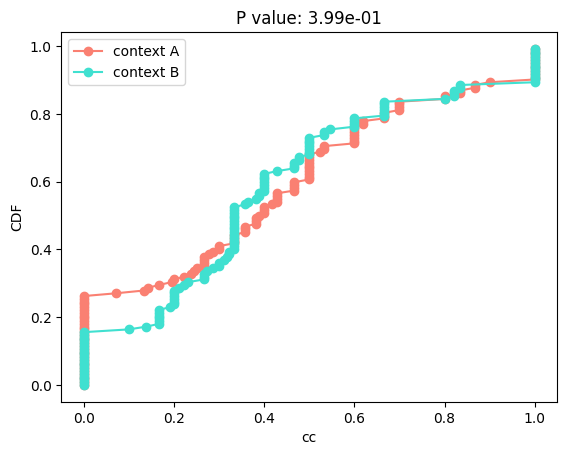

In [18]:
# Plotting CDF to compare two conditions
# Convert CSV to numpy.ndarry and index separate conditions
# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'dg_dataset.csv'

# Load dataset
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')

# Create CaGraphTimeSamples object
ts_cagraph = CaGraphTimeSamples(data=data, 
                                time_samples=[(0,1800), (1800,3600)], 
                                condition_labels=['context_B', 'context_A'], 
                                threshold=0.2)

# Context A: second half of data
cg_A = ts_cagraph.get_cagraph('context_A')
cg_A_cc = cg_A.graph_theory.get_clustering_coefficient()

# Context B: first half of data
cg_B = ts_cagraph.get_cagraph('context_B')
cg_B_cc = cg_B.graph_theory.get_clustering_coefficient()

# Plot histogram of distributions
viz.plot_histograms(data_list=[cg_A_cc, cg_B_cc],
                                x_label='cc',
                                colors=['salmon','turquoise'],
                                bin_size=20,
                                show_plot=True)

# Plot cumulative distribution function
viz.plot_CDFs(data_list=[cg_A_cc, cg_B_cc],
              x_label='cc',
              colors=['salmon', 'turquoise'],
              legend=['context A', 'context B'],
              show_plot=True)

# Plotting matched samples <a class="anchor" id="plotting_matched_samples"></a>

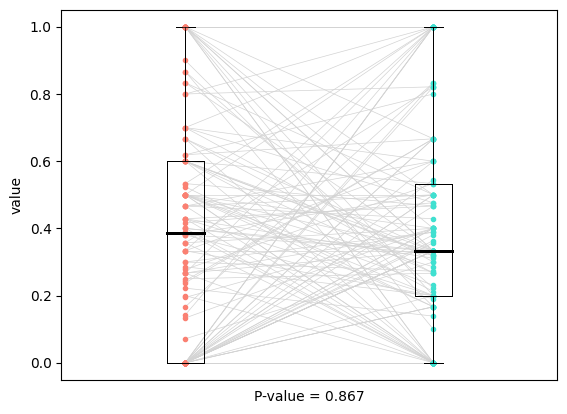

In [19]:
# Plotting matched samples
viz.plot_matched_data(sample_1=cg_A_cc,
                                  sample_2=cg_B_cc,
                                  labels=['A', 'B'],
                                  colors=['salmon','turquoise'],
                                  show_plot=True)

# Batched class <a class="anchor" id="batched_class"></a>

In [20]:
from cagraph import CaGraphBatch

# Set data path as the path to a directory containing multiple csv files which represent a condition, multiple animals
DATA_PATH = os.getcwd() + '/datasets/DG_FC/WT/WT_D1/'

# Create CaGraphBatch object named batch_cg with manually-set threshold
batch_cg = CaGraphBatch(data_path=DATA_PATH, threshold=0.2)
print(f"Individual dataset threshold is: {batch_cg.get_cagraph('122-2_D1').threshold}")
print(f"Overall threshold is: {batch_cg.threshold}")

Exception occurred for dataset 122-3_D1: PowerIterationFailedConvergence(PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Individual dataset threshold is: 0.2
Overall threshold is: 0.2


In [21]:
# Create CaGraphBatch object named batch_cg, but now make the threshold auto-generated and averaged across all datasets
batch_cg = CaGraphBatch(data_path=DATA_PATH, threshold_averaged=True)
print(f"Individual dataset threshold is: {batch_cg.get_cagraph('122-2_D1').threshold}")
print(f"Overall threshold is: {batch_cg.threshold}")


Exception occurred for dataset 122-3_D1: PowerIterationFailedConvergence(PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Individual dataset threshold is: 0.18627272727272726
Overall threshold is: 0.18627272727272726


In [22]:
# Create CaGraphBatch object named batch_cg, but do not set a threshold or auto-average
batch_cg = CaGraphBatch(data_path=DATA_PATH)
print(f"Individual dataset threshold for 122-2_D1 is: {batch_cg.get_cagraph('122-2_D1').threshold}")
print(f"Individual dataset threshold is 124-2_D1: {batch_cg.get_cagraph('124-2_D1').threshold}")
print(f"Overall threshold is: {batch_cg.threshold}")

Individual dataset threshold for 122-2_D1 is: 0.13699999999999998
Individual dataset threshold is 124-2_D1: 0.173
Overall threshold is: None


In [23]:
# Generate a batched report
WT_D1_report = batch_cg.get_full_report(save_report=True, save_path='/Users/veronica_porubsky/Desktop/', save_filename='WT_D1_full_report', save_filetype='csv')
display(WT_D1_report)


,1055-4_D1_hubs,122-2_D1_hubs,14-0_D1_hubs,396-1_D1_hubs,396-3_D1_hubs,...,124-2_D1_HITS,122-3_D1_HITS,122-1_D1_HITS,1055-3_D1_HITS,1055-1_D1_HITS
0,0.0,0.0,1.0,0.0,0.0,...,0.363214,0.016211,0.036805,0.044102,1.577152e-19
1,0.0,0.0,0.0,0.0,0.0,...,-0.000000,0.017434,0.027531,0.025653,4.993170e-02
2,0.0,0.0,0.0,0.0,0.0,...,-0.000000,0.005224,0.042493,0.003591,1.419437e-18
3,0.0,0.0,0.0,0.0,0.0,...,-0.000000,0.003198,0.114896,0.030217,3.587534e-03
4,0.0,0.0,1.0,0.0,0.0,...,-0.000000,0.003181,0.091500,0.000011,1.261721e-18
...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [24]:
# You can access individual CaGraph objects for each dataset by passing in a dataset identifer to get_cagraph
batch_cg.get_cagraph('122-2_D1').clustering_coefficient
cg = batch_cg.get_cagraph('122-2_D1')
cg.clustering_coefficient

{0: 0,
 1: 0,
 2: 1.0,
 3: 0,
 4: 0,
 5: 0.3333333333333333,
 6: 0,
 7: 0,
 8: 1.0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0.3333333333333333,
 17: 0.3333333333333333,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0.3333333333333333,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0.16666666666666666,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 1.0}

In [25]:
# If you want a list of the dataset identifiers to use in the get_cagraph() call, use:
batch_cg.dataset_identifiers

['1055-4_D1',
 '122-2_D1',
 '14-0_D1',
 '396-1_D1',
 '396-3_D1',
 '1055-2_D1',
 '124-2_D1',
 '122-3_D1',
 '122-1_D1',
 '1055-3_D1',
 '1055-1_D1']

In [26]:
# You can request specific analyes from the report DataFrame
cc_122_D1 = WT_D1_report['122-2_D1_clustering coefficient']

In [27]:
# You can get a list of the analyses included -- this will be updated, but currently you can use the Pandas 
# DataFrame functionality if you are familiar with this
list(WT_D1_report.columns)

['1055-4_D1_hubs',
 '122-2_D1_hubs',
 '14-0_D1_hubs',
 '396-1_D1_hubs',
 '396-3_D1_hubs',
 '1055-2_D1_hubs',
 '124-2_D1_hubs',
 '122-3_D1_hubs',
 '122-1_D1_hubs',
 '1055-3_D1_hubs',
 '1055-1_D1_hubs',
 '1055-4_D1_degree',
 '122-2_D1_degree',
 '14-0_D1_degree',
 '396-1_D1_degree',
 '396-3_D1_degree',
 '1055-2_D1_degree',
 '124-2_D1_degree',
 '122-3_D1_degree',
 '122-1_D1_degree',
 '1055-3_D1_degree',
 '1055-1_D1_degree',
 '1055-4_D1_clustering coefficient',
 '122-2_D1_clustering coefficient',
 '14-0_D1_clustering coefficient',
 '396-1_D1_clustering coefficient',
 '396-3_D1_clustering coefficient',
 '1055-2_D1_clustering coefficient',
 '124-2_D1_clustering coefficient',
 '122-3_D1_clustering coefficient',
 '122-1_D1_clustering coefficient',
 '1055-3_D1_clustering coefficient',
 '1055-1_D1_clustering coefficient',
 '1055-4_D1_communities',
 '122-2_D1_communities',
 '14-0_D1_communities',
 '396-1_D1_communities',
 '396-3_D1_communities',
 '1055-2_D1_communities',
 '124-2_D1_communities',
 